### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
df = pd.read_csv("churn.txt", sep = ",")

In [3]:
df.shape

(3333, 21)

In [4]:
df.head()

,state,account_length,area_code,phone_number,inter_plan,voice_m_plan,number_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_evening_calls,total_evening_charge,total_night_minutes,total_night_calls,total_night_charge,total_inter_minutes,total_inter_calls,total_inter_charge,number_customer_service_calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Checking for any missing values (null values) 
### As we can see there is no any missing values, all cells have value

In [5]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
inter_plan                       0
voice_m_plan                     0
number_voice_mail_messages       0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_evening_minutes            0
total_evening_calls              0
total_evening_charge             0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_inter_minutes              0
total_inter_calls                0
total_inter_charge               0
number_customer_service_calls    0
churn                            0
dtype: int64

### Having a look at data types of values in each column , by dtypes attribute

In [6]:
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
inter_plan                          bool
voice_m_plan                        bool
number_voice_mail_messages         int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_evening_minutes            float64
total_evening_calls                int64
total_evening_charge             float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_inter_minutes              float64
total_inter_calls                  int64
total_inter_charge               float64
number_customer_service_calls      int64
churn                               bool
dtype: object

We are having three columns with boolean values, named 'inter_plan','voice_m_plan','churn'

We have to convert boolean values to numbers as 1 and 0

True corresponds to 1 and False is 0

Cause ML algorithm understands only numbers

In [7]:
df['inter_plan'] = df['inter_plan'].astype(int)
df['voice_m_plan'] = df['voice_m_plan'].astype(int)
df['churn'] = df['churn'].astype(int)

In [8]:
df.head(5)

,state,account_length,area_code,phone_number,inter_plan,voice_m_plan,number_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_evening_calls,total_evening_charge,total_night_minutes,total_night_calls,total_night_charge,total_inter_minutes,total_inter_calls,total_inter_charge,number_customer_service_calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


We should see how features are correlated to label 

by using correlation matrix

In [9]:
corr_matrix = df.drop(['state','area_code'], axis = 1).corr()
corr_matrix

,account_length,inter_plan,voice_m_plan,number_voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,total_evening_minutes,total_evening_calls,total_evening_charge,total_night_minutes,total_night_calls,total_night_charge,total_inter_minutes,total_inter_calls,total_inter_charge,number_customer_service_calls,churn
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
inter_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_m_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_voice_mail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_evening_minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_evening_calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_evening_charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


heatmap is a bit easier to observe correlations with colors

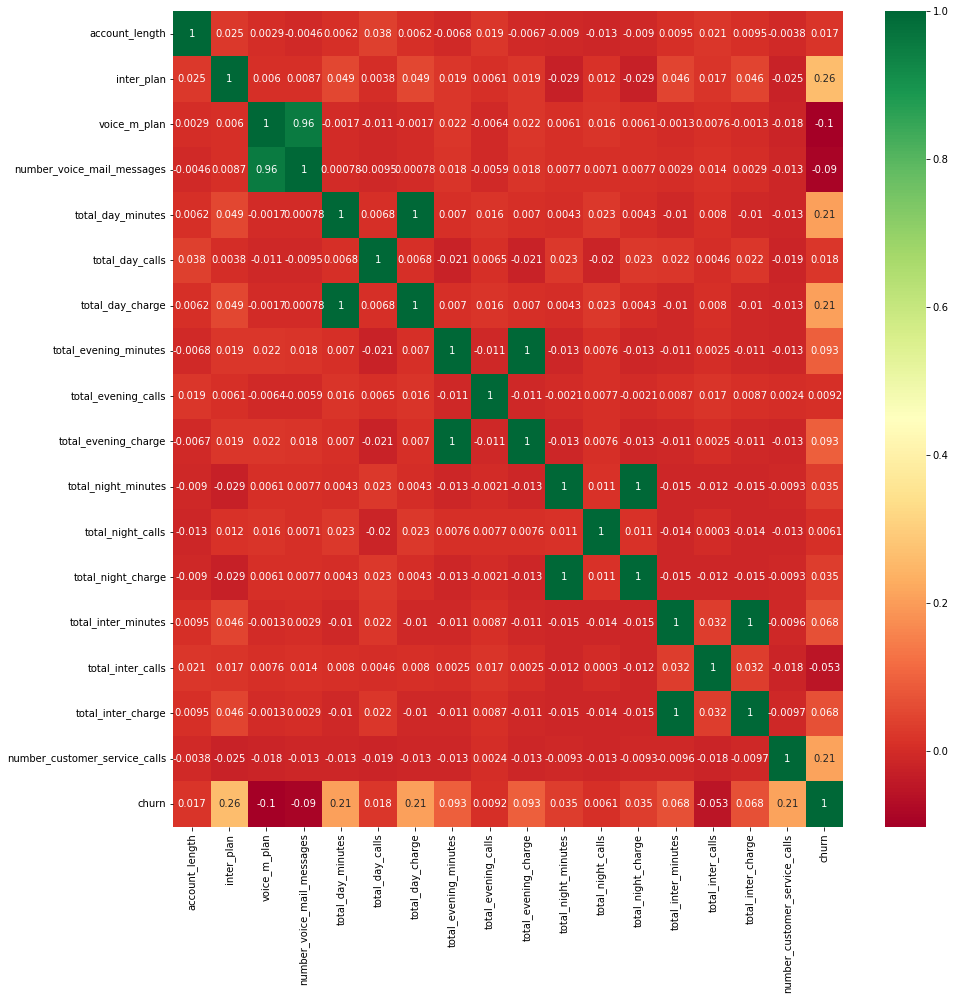

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, cmap = 'RdYlGn', annot = True)
plt.show()

Need to remove all unnecessary columns which are too irrelevant to label (churn)

In [11]:

X = df.drop(['state','area_code','phone_number','account_length','number_voice_mail_messages','total_day_calls','total_day_charge','total_evening_calls','total_evening_charge','total_night_minutes','total_night_calls','total_night_charge','total_inter_calls','total_inter_charge','churn'], axis = 1).values
y = df['churn'].values

In [12]:
X

array([[  0. ,   1. , 265.1, 197.4,  10. ,   1. ],
       [  0. ,   1. , 161.6, 195.5,  13.7,   1. ],
       [  0. ,   0. , 243.4, 121.2,  12.2,   0. ],
       ...,
       [  0. ,   0. , 180.8, 288.8,  14.1,   2. ],
       [  1. ,   0. , 213.8, 159.6,   5. ,   2. ],
       [  0. ,   1. , 234.4, 265.9,  13.7,   0. ]])

### Splitting data into training and testing part

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

### Applying Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)

print("Accuracy in Logistic Regression Model : ", log_reg.score(X_test,y_test))

Accuracy in Logistic Regression Model :  0.8680659670164917


In [15]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       570
           1       0.70      0.16      0.27        97

    accuracy                           0.87       667
   macro avg       0.78      0.58      0.60       667
weighted avg       0.85      0.87      0.83       667



### Confusion matrix is used how many labels are predicted right or wrong (True or False)

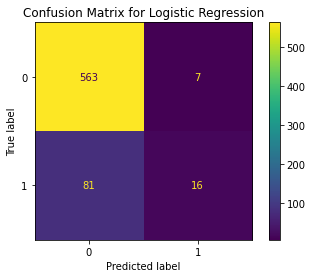

In [16]:
cm = confusion_matrix(y_test, log_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Above we can see 563  0's are predicted as 0, but 7  0's are predicted as 1
And 81 number of 1's predicted as 0, and 16 times 1's are predicted as 1

Applying KNN model 

Attempting to find K value where accuracy reaches maximum

Maximum accuracy  :  0.8830584707646177  is at K = 13


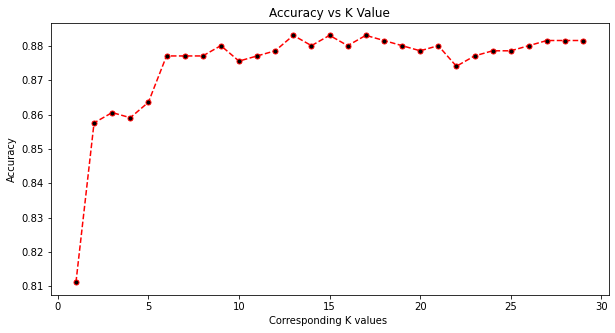

In [17]:
accuracy = []

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i in range(1,30):
    neighbors = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    kn_result = neighbors.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, kn_result))
    
plt.figure(figsize = (10,5))
plt.plot(range(1,30),accuracy, color = 'red', linestyle = 'dashed', 
         marker = 'o',markerfacecolor = 'black', markersize = 5)

plt.title('Accuracy vs K Value')
plt.xlabel('Corresponding K values ')
plt.ylabel('Accuracy')

print("Maximum accuracy  : ",max(accuracy)," is at K =", accuracy.index(max(accuracy))+1)

### KNN model

In [18]:
knn_model = KNeighborsClassifier(n_neighbors = 13)

knn_model.fit(X_train,y_train)

knn_pred = knn_model.predict(X_test)

print("Accuracy of KNN model  : ", knn_model.score(X_test,y_test))

Accuracy of KNN model  :  0.8830584707646177


              precision    recall  f1-score   support

           0       0.89      0.98      0.93       570
           1       0.72      0.32      0.44        97

    accuracy                           0.88       667
   macro avg       0.81      0.65      0.69       667
weighted avg       0.87      0.88      0.86       667



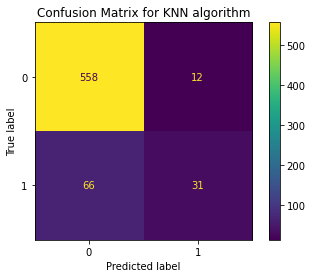

In [19]:
print(classification_report(y_test, knn_pred))
cm_knn = confusion_matrix(y_test, knn_pred)
cm_display = ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Confusion Matrix for KNN algorithm")
plt.show()

### Applying Decision Tree Algorithm

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state = 15)

dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)

print("Accuracy of Decision Tree Algorithm", dt.score(X_test, y_test))

Accuracy of Decision Tree Algorithm 0.8770614692653673


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       570
           1       0.57      0.61      0.59        97

    accuracy                           0.88       667
   macro avg       0.75      0.77      0.76       667
weighted avg       0.88      0.88      0.88       667



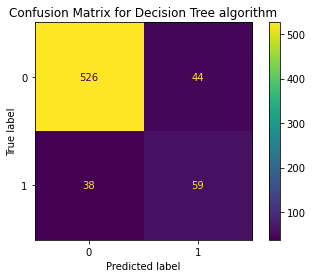

In [21]:
print(classification_report(y_test, dt_pred))

cm_dt=confusion_matrix(y_test, dt_pred)
cm_display=ConfusionMatrixDisplay(cm_dt).plot()

plt.title("Confusion Matrix for Decision Tree algorithm")
plt.show()

Among all predictions, I think Decision Tree algorithm predicting labels a bit accurate, rather than other algorithms